# Librerias

## Importación de librerías

In [1]:
#Se importan las librerías
## Numéricas
import pandas as pd
import numpy as np

## Formato fechas
from datetime import datetime, timedelta

## Gráficas
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from mlxtend.plotting import plot_decision_regions

## Modelos
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedKFold, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline, Pipeline

# Metricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, mean_absolute_percentage_error
from scipy import stats
import sklearn.metrics as metrics

Estilos de gráficas

In [2]:
# Configuración de estilos de matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Carga de datos

In [3]:
#Se importa la librería de google colab para gestionar archivos
from google.colab import files

In [4]:
#Se conecta con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Ruta donde se tienen los datos
ruta_datos='/content/drive/MyDrive/0_TFM_BD/data/'
ruta_datos_carga=ruta_datos+'saved/'

In [6]:
#Carga de los datos
df=pd.read_csv(ruta_datos_carga+'df_exp_2020-01-01_2022-01-01.csv')

#Generación del indice como fecha
df['date']=pd.to_datetime(df.date)
df.set_index('date', inplace=True)

df_ori=df.copy()

In [7]:
df

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,flag,^IBEX,futIBEX
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,0.0,9543.9,9528.3
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,0.0,9528.3,9511.7
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,1.0,9511.7,9572.5
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,1.0,9572.5,9681.3
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,0.0,9681.3,9658.8
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,1.0,8387.5,8459.1
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,1.0,8459.1,8563.7
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,1.0,8563.7,8563.7


In [8]:
#Resumen de datos del índice a predecir
num_sesiones=df[['futIBEX']].shape[0]
print("Se disponen de " + str(num_sesiones) + " sesiones para realizar el entrenmiento y validación")
df[['futIBEX']].describe()

Se disponen de 504 sesiones para realizar el entrenmiento y validación


,futIBEX
count,504.000000
mean,8128.926786
std,930.406970
min,6107.200000
25%,7217.600000
50%,8326.100000
75%,8884.900000
max,10083.600000


In [9]:
#Fechas de los datos de entrenamiento y validacion
date_format='%Y-%m-%d'
fecha_inicial=df.index.min().strftime(date_format)
fecha_final=df.index.max().strftime(date_format)
print("Primera fecha de los datos: ",fecha_inicial)
print("Última fecha de los datos: ",fecha_final)

Primera fecha de los datos:  2020-01-13
Última fecha de los datos:  2021-12-28


In [10]:
#Máximos éxitos posibles
max_rend=df['flag'].sum()
print('Máximo rendimiento económico posible:', max_rend)

Máximo rendimiento económico posible: 265.0


# Creación de los conjuntos de datos

In [11]:
#Columna donde se recogen las variables predictoras
var_pred=df.columns.to_list()
var_pred.remove('futIBEX')
var_pred.remove('flag')

In [12]:
#Se generan los df para X e y
X=df[var_pred]
y=df[['futIBEX']]

In [13]:
X

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
date,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3
...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7


In [14]:
#Se generan los conjuntos de datos mediante un split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True
                                    )

# Arbol de decisiones

## Generación del modelo 1

In [15]:
# Parametrización y generador del modelo
profundidad=10

In [16]:
# Generación del modelo
model_dt1 = DecisionTreeRegressor(criterion='absolute_error', max_depth=profundidad, random_state=0)

# Ajuste del modelo a los datos de entrenamiento
model_dt1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10, random_state=0)

### Gráfica del árbol generado

Se observa gráficamente el modelo generado por árbol de decisiones

Profundidad del árbol: 10
Número de nodos terminales: 211


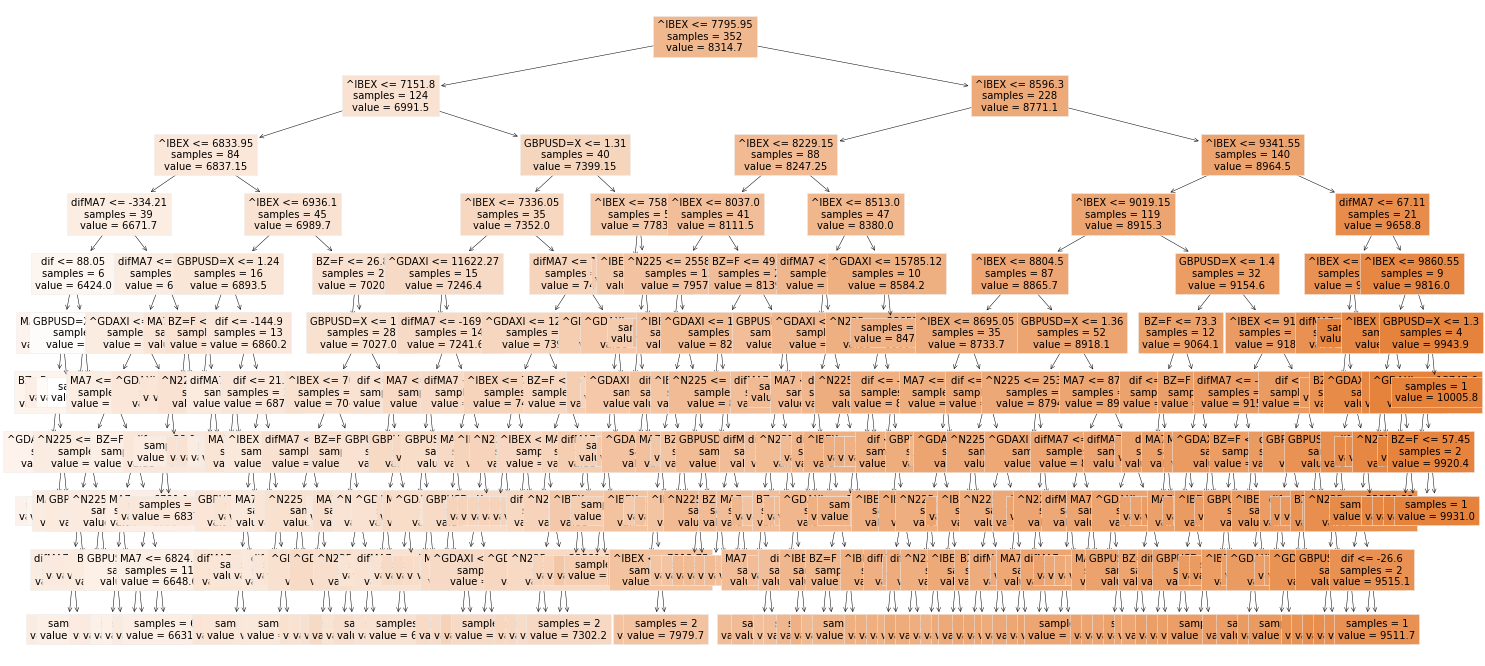

In [17]:
fig, ax = plt.subplots(figsize=(25, 12))

print(f"Profundidad del árbol: {model_dt1.get_depth()}")
print(f"Número de nodos terminales: {model_dt1.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_dt1,
            feature_names = df.drop(columns = ["futIBEX",'flag']).columns,
            class_names   = 'futIBEX',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

### Análisis de los predictores

Se van a analizar la importancia de los predictores seleccionados por el modelo

In [18]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df.drop(columns = ["futIBEX",'flag']).columns,
                             'importancia': model_dt1.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
7,^IBEX,0.913544
5,difMA7,0.023216
1,GBPUSD=X,0.017629
2,^GDAXI,0.010701
4,MA7,0.010116
0,BZ=F,0.008954
6,dif,0.008469
3,^N225,0.007372


Se observa como el principal predictor es el valor del IBEX en la sesión actual con una importancia superlativa, al ser del 0.914. Tras él, el siguiente predictor tiene una importancia del 0.023216 (difMA7).

In [19]:
lista_pred_dt=importancia_predictores.sort_values('importancia', ascending=False).copy()
lista_pred_dt.reset_index(inplace=True)

#Se busca con qué variables se obtiene una importancia del 95%
imp_acum=0
for indice, predictor in lista_pred_dt.iterrows():
  if imp_acum < 0.95:
    print("El predictor",predictor['predictor'],"añade una importancia de",round(predictor['importancia'],2))
    imp_acum=imp_acum+round(predictor['importancia'],2)
    print("Importancia acumulada:", imp_acum)
    ind_ultimo=indice
  else:
    print('\nIndice a usar:',ind_ultimo)
    break

#Se genera la lista de variables
lista_pred_dt=lista_pred_dt.predictor[0:(ind_ultimo+1)].tolist()

#Se usarán las siguintes variables:
print('\nSe usarán las siguintes variables:')
lista_pred_dt

El predictor ^IBEX añade una importancia de 0.91
Importancia acumulada: 0.91
El predictor difMA7 añade una importancia de 0.02
Importancia acumulada: 0.93
El predictor GBPUSD=X añade una importancia de 0.02
Importancia acumulada: 0.9500000000000001

Indice a usar: 2

Se usarán las siguintes variables:


['^IBEX', 'difMA7', 'GBPUSD=X']

## Generación del modelo 2

#### Modificación de los conjuntos de datos

In [20]:
#Se modifican los conjuntos de entrenamiento en base a las observacione del primer modelo
df2=df[lista_pred_dt+['futIBEX']]

#Se modifica la lista de variables predictoras
X_dt=df2[lista_pred_dt]
y_dt=y.copy()

In [21]:
X_dt

,^IBEX,difMA7,GBPUSD=X
date,,,
2020-01-13,9543.9,-65.428571,1.3046
2020-01-14,9528.3,-59.985714,1.2988
2020-01-15,9511.7,-59.685714,1.3023
2020-01-16,9572.5,13.857143,1.3041
2020-01-17,9681.3,123.700000,1.3079
...,...,...,...
2021-12-21,8387.5,63.157143,1.3210
2021-12-22,8459.1,130.857143,1.3270
2021-12-23,8563.7,215.971429,1.3352


In [22]:
y_dt

,futIBEX
date,
2020-01-13,9528.3
2020-01-14,9511.7
2020-01-15,9572.5
2020-01-16,9681.3
2020-01-17,9658.8
...,...
2021-12-21,8459.1
2021-12-22,8563.7
2021-12-23,8563.7


In [23]:
#Se generan los conjuntos de datos mediante un split
X_train, X_test, y_train, y_test = train_test_split(
                                        X_dt,
                                        y_dt,
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Generación y ajuste del modelo

In [24]:
# Parametrización y generador del modelo
profundidad=10

In [25]:
# Generación del modelo
model_dt2 = DecisionTreeRegressor(criterion='absolute_error', max_depth=profundidad, random_state=0)

# Ajuste del modelo a los datos de entrenamiento
model_dt2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10, random_state=0)

### Gráfica del árbol generado

Se observa gráficamente el modelo generado por árbol de decisiones

Profundidad del árbol: 10
Número de nodos terminales: 228


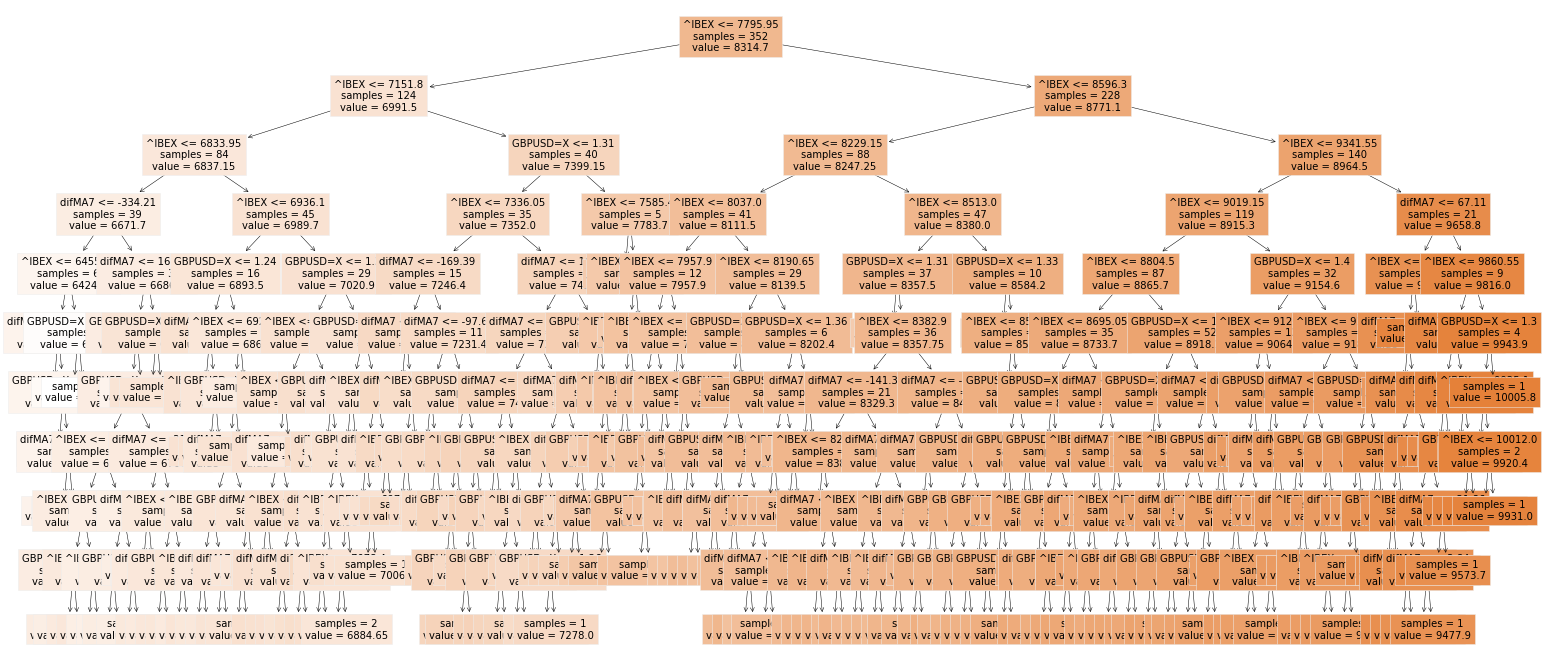

In [26]:
fig, ax = plt.subplots(figsize=(26, 12))

print(f"Profundidad del árbol: {model_dt2.get_depth()}")
print(f"Número de nodos terminales: {model_dt2.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_dt2,
            feature_names = df2.columns,
            class_names   = 'futIBEX',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

### Análisis de los predictores

Se van a analizar la importancia de los predictores seleccionados por el modelo

In [27]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df2.drop(columns = "futIBEX").columns,
                             'importancia': model_dt2.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,^IBEX,0.929636
1,difMA7,0.035923
2,GBPUSD=X,0.034441


Se observa como el precio actual del IBEX sigue siendo la variable más representativa y como el resto de variables predictoras tienen una relevancia mucho menor que esta primera

### Evaluación de diferentes profundidades

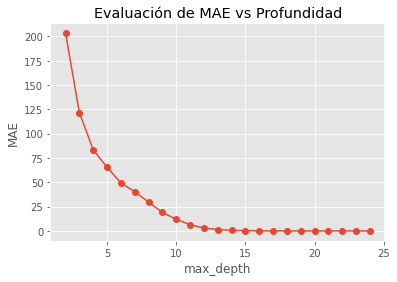

In [28]:
mae = []
#Rango de profundidades
prof_min=2
prof_max=25

for i in range(prof_min, prof_max): 
    modelo_dt3 = DecisionTreeRegressor(max_depth=i)
    modelo_dt3.fit(X_train, y_train)
    pred_values = modelo_dt3.predict(X_train)
    maev = mean_absolute_error(y_train,pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(range(prof_min,prof_max), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('Evaluación de MAE vs Profundidad')
plt.show();

Se observa que a partir de una profundidad de 16 el MAE deja de mejorar, por tanto se escogerá este valor como parámetro para el entrenamiento del modelo de árbol de decisiones

## Generación del modelo 3

### Generación y ajuste del modelo

In [29]:
# Parametrización y generador del modelo
profundidad=16

In [30]:
# Generación del modelo
model_dt3 = DecisionTreeRegressor(criterion='absolute_error', max_depth=profundidad, random_state=0)

# Ajuste del modelo a los datos de entrenamiento
model_dt3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=16, random_state=0)

### Gráfica del árbol generado

Se observa gráficamente el modelo generado por árbol de decisiones

Profundidad del árbol: 16
Número de nodos terminales: 345


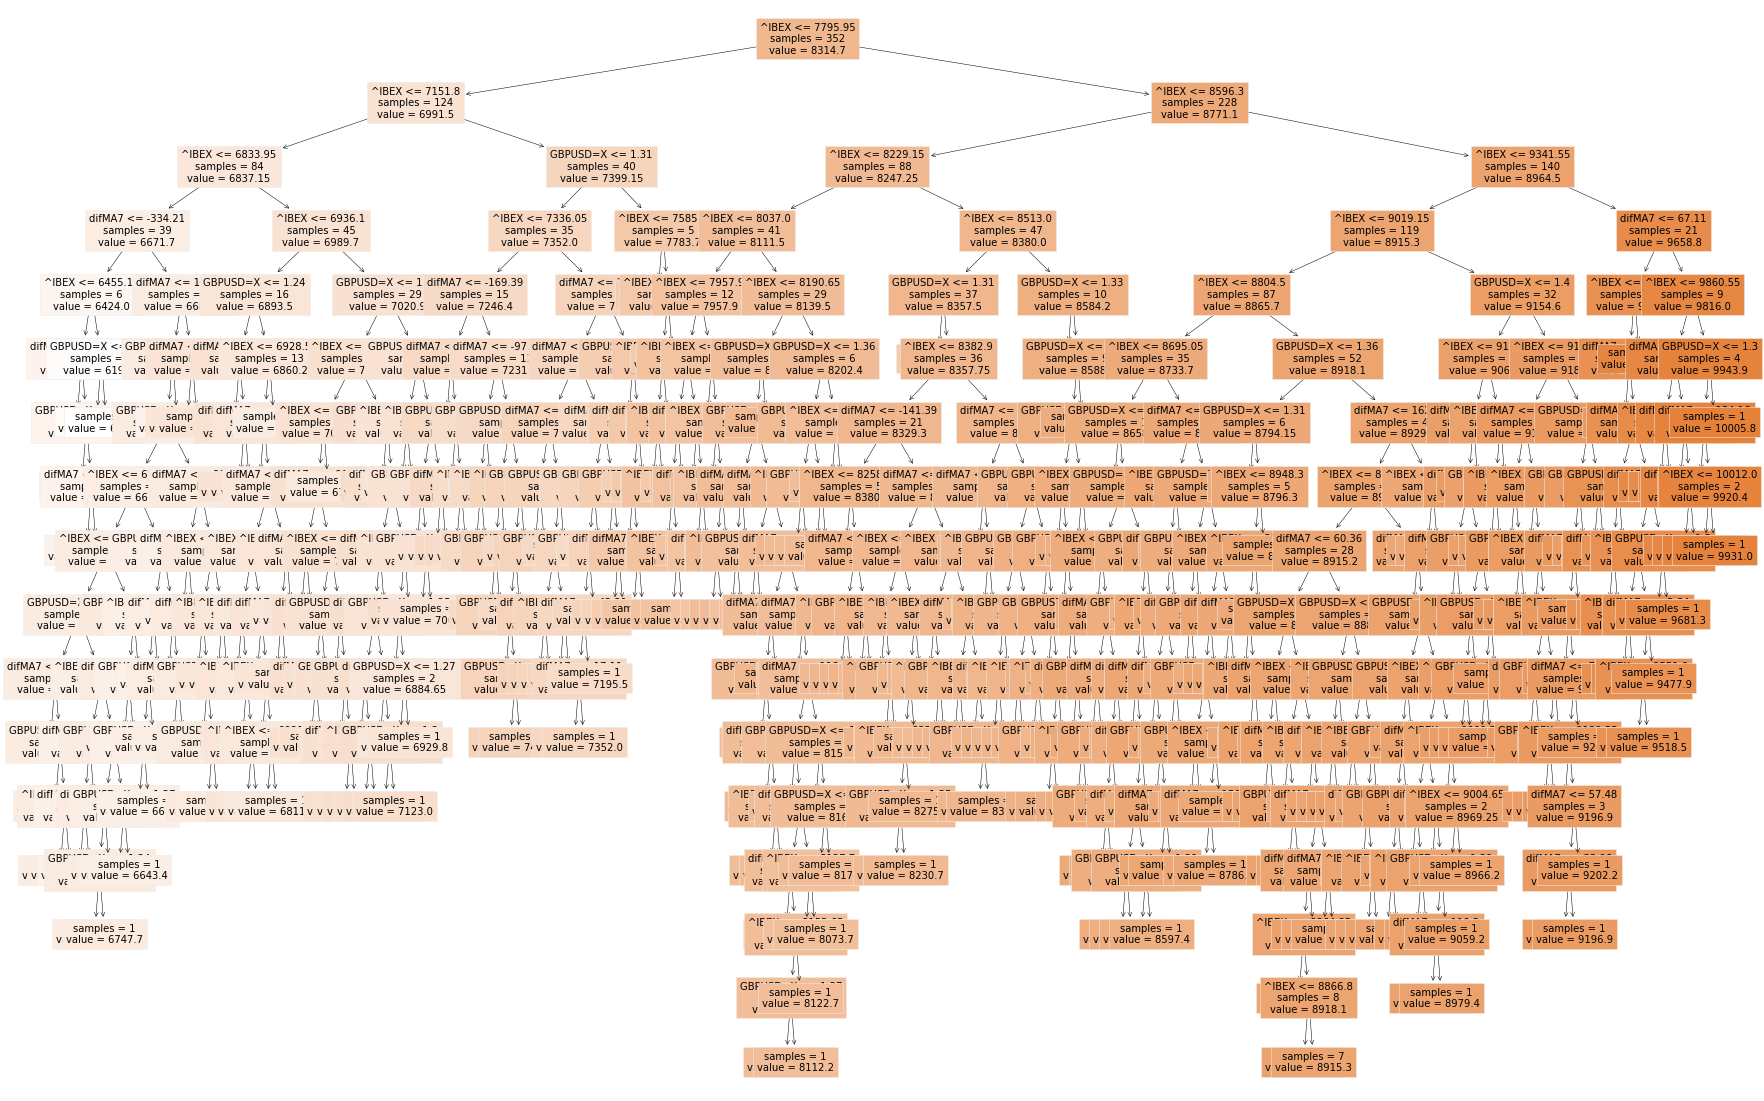

In [31]:
fig, ax = plt.subplots(figsize=(30, 20))

print(f"Profundidad del árbol: {model_dt3.get_depth()}")
print(f"Número de nodos terminales: {model_dt3.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_dt3,
            feature_names = df2.columns,
            class_names   = 'futIBEX',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

### Análisis de los predictores

Se van a analizar la importancia de los predictores seleccionados por el modelo

In [32]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df2.drop(columns = "futIBEX").columns,
                             'importancia': model_dt3.feature_importances_}
                            )
print("Importancia de los predictores en el modelo 3")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo 3
-------------------------------------------


,predictor,importancia
0,^IBEX,0.919591
2,GBPUSD=X,0.042050
1,difMA7,0.038359


## Predicción

### Análisis de resultados

In [33]:
X_train

,^IBEX,difMA7,GBPUSD=X
date,,,
2020-03-25,6942.4,561.385714,1.1792
2020-12-02,8220.8,106.214286,1.3423
2020-12-28,8155.6,121.400000,1.3572
2020-09-02,6996.9,-73.185714,1.3399
2021-04-23,8618.6,29.900000,1.3840
...,...,...,...
2020-06-02,7408.1,368.857143,1.2487
2021-11-18,8903.2,-170.942857,1.3492
2021-04-16,8613.5,39.400000,1.3785


### TRAIN

In [34]:
#Se realiza la predicción sobre el modelo 3
y_pred_dt_train = model_dt3.predict(X_train)

In [35]:
len(y_pred_dt_train)

352

In [36]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_train, y_pred_dt_train)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_train, y_pred_dt_train)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_train, y_pred_dt_train)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_train,y_pred_dt_train)

print("- TRAIN -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))


- TRAIN -
Resultado de las métricas:
MAE: 0.34
MAPE: 0.0
RMSE 4.07
R2: 1.0


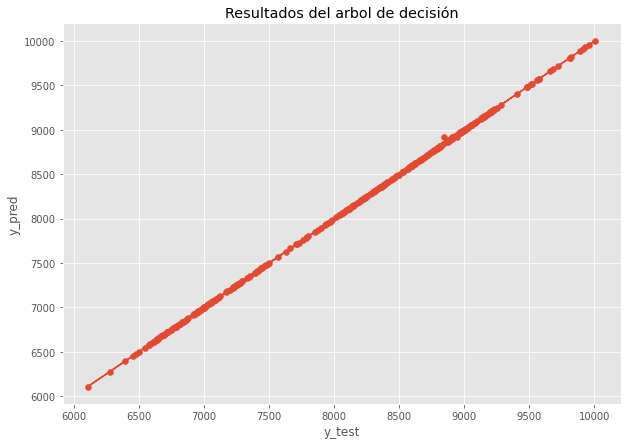

In [37]:
# Se realiza la gráfica 
plt.figure(figsize=(10,7))
plt.scatter(y_train,y_pred_dt_train) 
plt.plot(y_pred_dt_train, y_pred_dt_train)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.title('Resultados del arbol de decisión')
plt.show()

#### Análisis de residuos

In [38]:
y_verdad=y_train.copy()
y_verdad.reset_index(drop=True, inplace=True)
y_verdad

,futIBEX
0,7033.2
1,8200.7
2,8174.8
3,7006.0
4,8701.9
...,...
347,7626.4
348,8753.2
349,8711.4
350,8816.7


In [39]:
y_prediccion=pd.DataFrame(y_pred_dt_train, columns=['pred'])
y_prediccion

,pred
0,7033.2
1,8200.7
2,8174.8
3,7006.0
4,8701.9
...,...
347,7626.4
348,8753.2
349,8711.4
350,8816.7


In [40]:
# Análisis de residuos
residuos_train=y_prediccion['pred'] - y_verdad['futIBEX']
residuos_train

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
347    0.0
348    0.0
349    0.0
350    0.0
351    0.0
Length: 352, dtype: float64

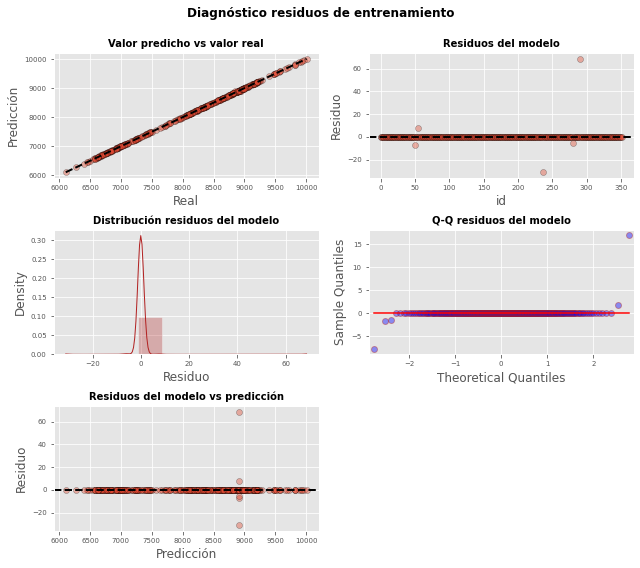

In [41]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_train, y_pred_dt_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(y_pred_dt_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de entrenamiento', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [42]:
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.06536078453063965, pvalue=3.8901973556343833e-38)

In [43]:
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 689.185038310204, p-value = 2.2149831450388071e-150


### TEST

In [44]:
#Se realiza la predicción sobre el modelo 3
y_pred_dt_test = model_dt3.predict(X_test)

In [45]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_test, y_pred_dt_test)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_test, y_pred_dt_test)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_test, y_pred_dt_test)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_test,y_pred_dt_test)

print("- TEST -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

- TEST -
Resultado de las métricas:
MAE: 129.54
MAPE: 0.02
RMSE 180.04
R2: 0.96


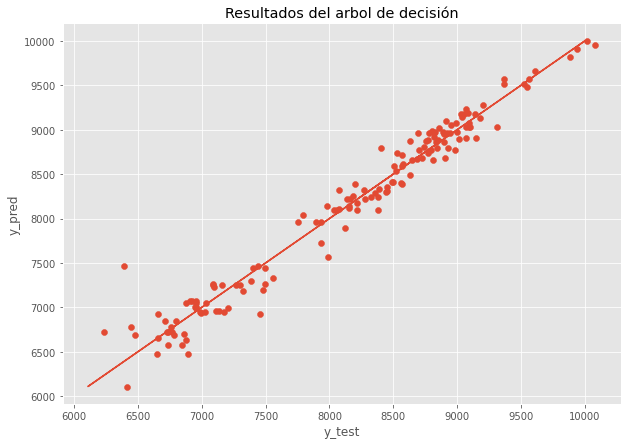

In [46]:
# Se realiza la gráfica 
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred_dt_test) 
plt.plot(y_pred_dt_test, y_pred_dt_test)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.title('Resultados del arbol de decisión')
plt.show()

#### Análisis de residuos

In [47]:
y_verdad=y_test.copy()
y_verdad.reset_index(drop=True, inplace=True)
y_verdad

,futIBEX
0,8635.4
1,8058.1
2,8694.8
3,8821.3
4,8780.0
...,...
147,6856.8
148,7154.3
149,8688.9
150,9092.2


In [48]:
y_prediccion=pd.DataFrame(y_pred_dt_test, columns=['pred'])
y_prediccion

,pred
0,8879.4
1,8091.5
2,8967.8
3,8962.8
4,8967.8
...,...
147,6697.5
148,7250.5
149,8673.7
150,9030.6


In [49]:
# Análisis de residuos
residuos_test=y_prediccion['pred'] - y_verdad['futIBEX']
residuos_test

0      244.0
1       33.4
2      273.0
3      141.5
4      187.8
       ...  
147   -159.3
148     96.2
149    -15.2
150    -61.6
151    -80.3
Length: 152, dtype: float64

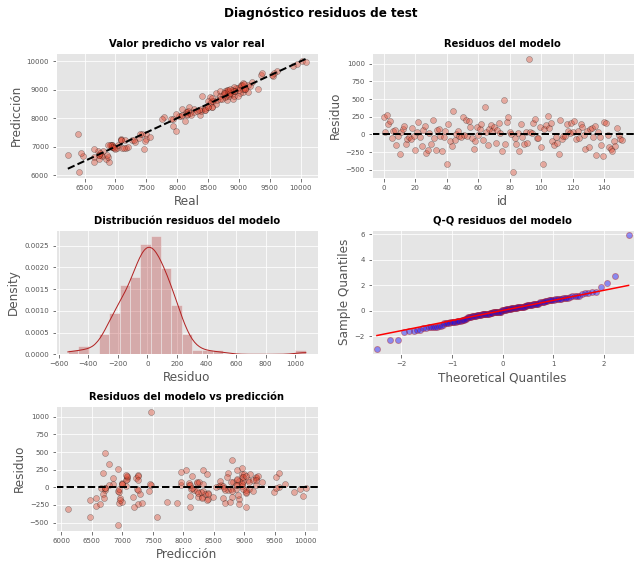

In [50]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_test, y_pred_dt_test, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_test))), residuos_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_test,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(y_pred_dt_test, residuos_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de test', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [51]:
shapiro_test = stats.shapiro(residuos_test)
shapiro_test

ShapiroResult(statistic=0.9199143052101135, pvalue=1.7968103804832936e-07)

In [52]:
k2, p_value = stats.normaltest(residuos_test)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 56.58013474838356, p-value = 5.173445123258669e-13


#### Despliegue del modelo

In [53]:
#Valores y del test
y_test

,futIBEX
date,
2021-09-14,8635.4
2021-02-17,8058.1
2021-07-12,8694.8
2021-11-19,8821.3
2021-09-13,8780.0
...,...
2020-05-22,6856.8
2020-08-13,7154.3
2021-12-27,8688.9


In [54]:
#Predicciones de y del test
y_verdad=y_test.copy()
y_verdad.reset_index(drop=False, inplace=True)
y_pred_dt_test=y_verdad.join(y_prediccion).set_index('date').drop('futIBEX', axis=1)
y_pred_dt_test

,pred
date,
2021-09-14,8879.4
2021-02-17,8091.5
2021-07-12,8967.8
2021-11-19,8962.8
2021-09-13,8967.8
...,...
2020-05-22,6697.5
2020-08-13,7250.5
2021-12-27,8673.7


In [55]:
#Se genera un conjunto de datos 
df_test=pd.merge(X_test[['^IBEX']], y_test, on='date')
df_test=pd.merge(df_test, df_ori[['dif','flag']], on='date')
df_test=pd.merge(df_test, y_pred_dt_test, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_test['preddif']=round(df_test['pred']-df_test['^IBEX'],2)

#Se calculan las señales de compra
df_test.loc[df_test['preddif'] >= 0, 'predflag'] = 1 
df_test.loc[df_test['preddif'] < 0, 'predflag'] = 0
df_test

,^IBEX,futIBEX,dif,flag,pred,preddif,predflag
date,,,,,,,
2021-09-14,8780.0,8635.4,-36.1,0.0,8879.4,99.4,1.0
2021-02-17,8122.7,8058.1,-31.0,0.0,8091.5,-31.2,0.0
2021-07-12,8816.7,8694.8,40.1,0.0,8967.8,151.1,1.0
2021-11-19,8753.2,8821.3,-150.0,1.0,8962.8,209.6,1.0
2021-09-13,8816.1,8780.0,120.8,0.0,8967.8,151.7,1.0
...,...,...,...,...,...,...,...
2020-05-22,6697.5,6856.8,11.4,1.0,6697.5,0.0,1.0
2020-08-13,7250.5,7154.3,-45.5,0.0,7250.5,0.0,1.0
2021-12-27,8622.1,8688.9,58.4,1.0,8673.7,51.6,1.0


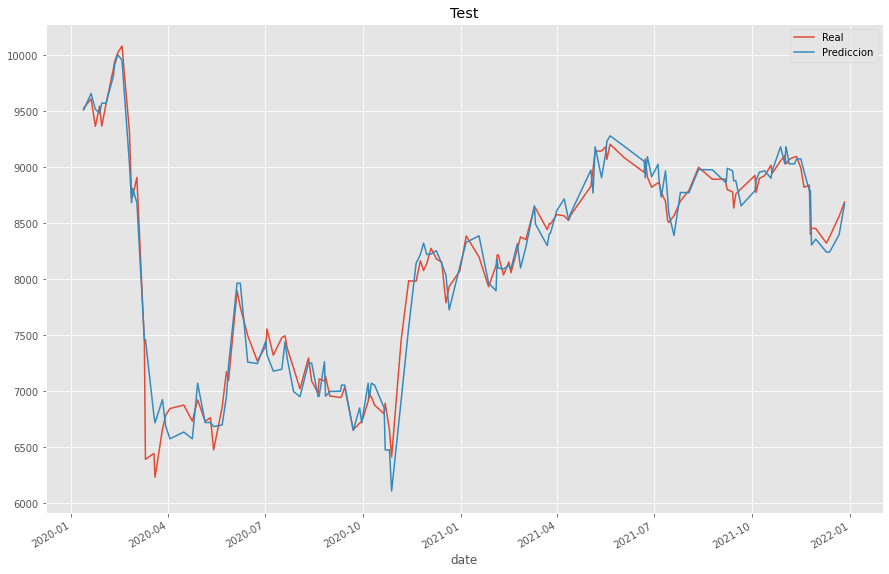

In [56]:
df_test[['futIBEX', 'pred']].plot(figsize=(15,10))
plt.legend(['Real','Prediccion'])
plt.title('Test');

In [57]:
y_true=df_test['flag']
y_pred=df_test['predflag']

In [58]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.4888888888888889

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.4407894736842105

### Prueba del modelo predictivo para obtener beneficios

In [60]:
df_ori

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,flag,^IBEX,futIBEX
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,0.0,9543.9,9528.3
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,0.0,9528.3,9511.7
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,1.0,9511.7,9572.5
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,1.0,9572.5,9681.3
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,0.0,9681.3,9658.8
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,1.0,8387.5,8459.1
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,1.0,8459.1,8563.7
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,1.0,8563.7,8563.7


In [61]:
X_train.columns.tolist()

['^IBEX', 'difMA7', 'GBPUSD=X']

In [62]:
#Se va a probar el modelo de regresión para todo el rango de valores del estudio
var_pruebas=X_train.columns.tolist()
df_pruebas=df_ori[var_pruebas+['dif','flag']]
df_pruebas

,^IBEX,difMA7,GBPUSD=X,dif,flag
date,,,,,
2020-01-13,9543.9,-65.428571,1.3046,-29.7,0.0
2020-01-14,9528.3,-59.985714,1.2988,-15.6,0.0
2020-01-15,9511.7,-59.685714,1.3023,-16.6,1.0
2020-01-16,9572.5,13.857143,1.3041,60.8,1.0
2020-01-17,9681.3,123.700000,1.3079,108.8,0.0
...,...,...,...,...,...
2021-12-21,8387.5,63.157143,1.3210,145.1,1.0
2021-12-22,8459.1,130.857143,1.3270,71.6,1.0
2021-12-23,8563.7,215.971429,1.3352,104.6,1.0


In [63]:
#Se realiza la predicción para todo el conjunto
df_pruebas['predIBEX'] = model_dt3.predict(df_pruebas.iloc[:,0:3])
df_pruebas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,^IBEX,difMA7,GBPUSD=X,dif,flag,predIBEX
date,,,,,,
2020-01-13,9543.9,-65.428571,1.3046,-29.7,0.0,9511.7
2020-01-14,9528.3,-59.985714,1.2988,-15.6,0.0,9511.7
2020-01-15,9511.7,-59.685714,1.3023,-16.6,1.0,9572.5
2020-01-16,9572.5,13.857143,1.3041,60.8,1.0,9681.3
2020-01-17,9681.3,123.700000,1.3079,108.8,0.0,9658.8
...,...,...,...,...,...,...
2021-12-21,8387.5,63.157143,1.3210,145.1,1.0,8459.1
2021-12-22,8459.1,130.857143,1.3270,71.6,1.0,8399.6
2021-12-23,8563.7,215.971429,1.3352,104.6,1.0,8563.7


In [64]:
#Se calcula la diferencia esperada entre el valor predicho para mañana y el valor real de hoy
df_pruebas['preddif']=round((df_pruebas['predIBEX']-df_pruebas['^IBEX']),2)
df_pruebas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,^IBEX,difMA7,GBPUSD=X,dif,flag,predIBEX,preddif
date,,,,,,,
2020-01-13,9543.9,-65.428571,1.3046,-29.7,0.0,9511.7,-32.2
2020-01-14,9528.3,-59.985714,1.2988,-15.6,0.0,9511.7,-16.6
2020-01-15,9511.7,-59.685714,1.3023,-16.6,1.0,9572.5,60.8
2020-01-16,9572.5,13.857143,1.3041,60.8,1.0,9681.3,108.8
2020-01-17,9681.3,123.700000,1.3079,108.8,0.0,9658.8,-22.5
...,...,...,...,...,...,...,...
2021-12-21,8387.5,63.157143,1.3210,145.1,1.0,8459.1,71.6
2021-12-22,8459.1,130.857143,1.3270,71.6,1.0,8399.6,-59.5
2021-12-23,8563.7,215.971429,1.3352,104.6,1.0,8563.7,0.0


In [65]:
#Se calcula la señal de compra-venta con la predicción
#Si el valor predicho para mañana es superior o igual, se compra (1)
#Si el valor predicho para mañana es inferior, se vende (0)
#Se calculan las señales de compra
df_pruebas.loc[df_pruebas['preddif'] >= 0, 'predflag'] = 1 
df_pruebas.loc[df_pruebas['preddif'] < 0, 'predflag'] = 0
df_pruebas

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,^IBEX,difMA7,GBPUSD=X,dif,flag,predIBEX,preddif,predflag
date,,,,,,,,
2020-01-13,9543.9,-65.428571,1.3046,-29.7,0.0,9511.7,-32.2,0.0
2020-01-14,9528.3,-59.985714,1.2988,-15.6,0.0,9511.7,-16.6,0.0
2020-01-15,9511.7,-59.685714,1.3023,-16.6,1.0,9572.5,60.8,1.0
2020-01-16,9572.5,13.857143,1.3041,60.8,1.0,9681.3,108.8,1.0
2020-01-17,9681.3,123.700000,1.3079,108.8,0.0,9658.8,-22.5,0.0
...,...,...,...,...,...,...,...,...
2021-12-21,8387.5,63.157143,1.3210,145.1,1.0,8459.1,71.6,1.0
2021-12-22,8459.1,130.857143,1.3270,71.6,1.0,8399.6,-59.5,0.0
2021-12-23,8563.7,215.971429,1.3352,104.6,1.0,8563.7,0.0,1.0


### Evaluación del rendimiento económico

In [66]:
# Función para la evaluación de la operación
def evalua (prediccion, realidad):
  if prediccion == 1 and realidad ==1:
    res=1
  elif prediccion == 0 and realidad ==1:
    res=0
  elif prediccion == 1 and realidad ==0:
    res=-1
  elif prediccion == 0 and realidad ==0:
    res=0
  return res

In [67]:
#Cálculo del rendimiento de las operaciones
rend_total=0
for index, fila in df_pruebas.iterrows():
  rendimiento=evalua(fila['predflag'],fila['flag'])
  rend_total=rend_total+rendimiento
print("Rendimiento acumulado:",rend_total)

Rendimiento acumulado: 178


---

# KNN

## Creación de los conjuntos de datos

## Preparación de los datos

Para emplear el algoritmo de KNN se deben normalizar los datos de los predictores de manera que ninguno de ellas tenga una relevancia excesiva frente a otras.

Se escalan los datos mediante el MinMaxScaler

In [68]:
#Se genera el escalador
scaler = MinMaxScaler()

In [69]:
#Columna donde se recogen las variables predictoras
var_pred=df.columns.to_list()
var_pred.remove('futIBEX')
var_pred.remove('flag')

In [70]:
#Se generan los df para X e y
X=df[var_pred]
y=df[['futIBEX']]

In [71]:
#Se generan los conjuntos de datos mediante un split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True
                                    )

In [72]:
X_test

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
date,,,,,,,,
2021-09-14,73.60,1.3838,15722.99,30670.10,8827.357143,-47.357143,-36.1,8780.0
2021-02-17,64.34,1.3888,13909.27,30292.19,8119.314286,3.385714,-31.0,8122.7
2021-07-12,75.16,1.3900,15790.51,28569.02,8846.900000,-30.200000,40.1,8816.7
2021-11-19,78.89,1.3500,16159.97,29745.87,9049.614286,-296.414286,-150.0,8753.2
2021-09-13,73.51,1.3841,15701.42,30447.37,8850.971429,-34.871429,120.8,8816.1
...,...,...,...,...,...,...,...,...
2020-05-22,35.13,1.2223,11073.87,20388.16,6630.000000,67.500000,11.4,6697.5
2020-08-13,44.96,1.3048,12993.71,23249.61,7083.300000,167.200000,-45.5,7250.5
2021-12-27,78.60,1.3404,15835.25,28676.46,8374.185714,247.914286,58.4,8622.1


In [73]:
#Se obtienen los nombres de las columnas
col_train=X_train.columns.to_list()
col_train

['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225', 'MA7', 'difMA7', 'dif', '^IBEX']

In [74]:
#Se escalan los conjuntos de test y train
X_train_n = scaler.fit_transform(X_train)
X_train_n = pd.DataFrame(X_train_n, columns=col_train)

X_test_n = scaler.fit_transform(X_test)
X_test_n = pd.DataFrame(X_test_n, columns=col_train)

In [75]:
X_train_n

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
0,0.120173,0.074496,0.183439,0.204574,0.003470,0.881691,0.777363,0.210039
1,0.431191,0.694413,0.623802,0.730817,0.483680,0.712257,0.688590,0.531536
2,0.470106,0.751045,0.684888,0.734665,0.461413,0.717910,0.666626,0.515139
3,0.374236,0.685291,0.614863,0.473016,0.194347,0.645477,0.664117,0.223745
4,0.697480,0.852908,0.875598,0.891834,0.615013,0.683850,0.616274,0.631576
...,...,...,...,...,...,...,...,...
347,0.301774,0.338655,0.458366,0.406166,0.185804,0.810024,0.753870,0.327155
348,0.923065,0.720639,0.996235,0.933766,0.749484,0.609088,0.584460,0.703149
349,0.707321,0.832003,0.898663,0.939911,0.610969,0.687386,0.665280,0.630294
350,0.838229,0.834284,0.927882,0.813474,0.688301,0.644180,0.717039,0.671311


In [76]:
#Se resetean los índices de y_train
y_train_knn = y_train.copy()
y_train_knn.reset_index(drop = True, inplace = True)
y_train_knn

,futIBEX
0,7033.2
1,8200.7
2,8174.8
3,7006.0
4,8701.9
...,...
347,7626.4
348,8753.2
349,8711.4
350,8816.7


In [77]:
#Se unen las variables predictoras con las etiquetas para la cross validation
df_n = X_train_n.join(y_train_knn)
df_n

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,futIBEX
0,0.120173,0.074496,0.183439,0.204574,0.003470,0.881691,0.777363,0.210039,7033.2
1,0.431191,0.694413,0.623802,0.730817,0.483680,0.712257,0.688590,0.531536,8200.7
2,0.470106,0.751045,0.684888,0.734665,0.461413,0.717910,0.666626,0.515139,8174.8
3,0.374236,0.685291,0.614863,0.473016,0.194347,0.645477,0.664117,0.223745,7006.0
4,0.697480,0.852908,0.875598,0.891834,0.615013,0.683850,0.616274,0.631576,8701.9
...,...,...,...,...,...,...,...,...,...
347,0.301774,0.338655,0.458366,0.406166,0.185804,0.810024,0.753870,0.327155,7626.4
348,0.923065,0.720639,0.996235,0.933766,0.749484,0.609088,0.584460,0.703149,8753.2
349,0.707321,0.832003,0.898663,0.939911,0.610969,0.687386,0.665280,0.630294,8711.4
350,0.838229,0.834284,0.927882,0.813474,0.688301,0.644180,0.717039,0.671311,8816.7


## Selección de hiperparámetros

Para escoger los hiperparámetros de un KNN, se va a realizar una validación cruzada teniendo como medida de la bondad de los parámetros seleccionados el MAE:

In [78]:
#Se crea el objeto para la validación cruzada
cv = KFold(n_splits = 10, shuffle = False)

Min Value uniform : 89.31133809523804 (5)
Min Value distance : 87.58279333696025 (5)


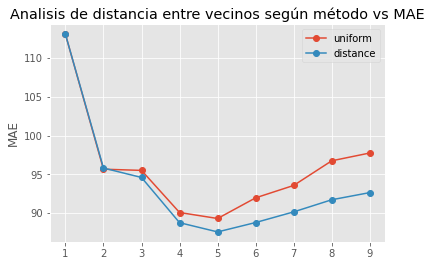

In [79]:
#Evaluación de los métodos "uniform" y "distance" para diferentes número de vecinos

rango_min=1
rango_max=10

for i, weights in enumerate(['uniform', 'distance']): #Bucle para evaluar el método de la distancia a escoger
   total_scores = []
   for n_neighbors in range(rango_min,rango_max): #Bucle para escoger la distancia de los vecinos
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)

       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(df_n):

          # División train test aleatoria
          f_train = df_n.loc[train_fold]
          f_test = df_n.loc[test_fold]

          # entrenamiento y ejecución del modelo
          knn.fit(X = f_train.drop(['futIBEX'], axis=1), y = f_train['futIBEX'])
          y_pred = knn.predict(X = f_test.drop(['futIBEX'], axis = 1))
          
          # evaluación del modelo
          mae = mean_absolute_error(f_test['futIBEX'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.title('Analisis de distancia entre vecinos según método vs MAE')
plt.show()

Se observa como para reducir el MAE del modelo de entrenamiento se debe usar el método "distance" con una distancia de valor 5

## Generación del modelo 4


Una vez determinados los hiperparámetros, se genera el modelo

In [80]:
# Constructor
n_neighbors = 5
weights = 'distance'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights)

# Ajuste del modelo
knn.fit( X = df_n.drop(['futIBEX'], axis=1), y = df_n['futIBEX'])

KNeighborsRegressor(weights='distance')

## Predicciones

### TRAIN

In [81]:
#Predicción
y_pred_knn_train = knn.predict(X_train_n)
y_pred_knn_train = pd.DataFrame(y_pred_knn_train, columns = ['futIBEX'])
y_pred_knn_train

,futIBEX
0,7033.2
1,8200.7
2,8174.8
3,7006.0
4,8701.9
...,...
347,7626.4
348,8753.2
349,8711.4
350,8816.7


In [82]:
y_train

,futIBEX
date,
2020-03-25,7033.2
2020-12-02,8200.7
2020-12-28,8174.8
2020-09-02,7006.0
2021-04-23,8701.9
...,...
2020-06-02,7626.4
2021-11-18,8753.2
2021-04-16,8711.4


In [83]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_train, y_pred_knn_train)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_train, y_pred_knn_train)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_train, y_pred_knn_train)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#
r2 = metrics.r2_score(y_train,y_pred_knn_train)

print("- TRAIN -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))


- TRAIN -
Resultado de las métricas:
MAE: 0.0
MAPE: 0.0
RMSE 0.0
R2: 1.0


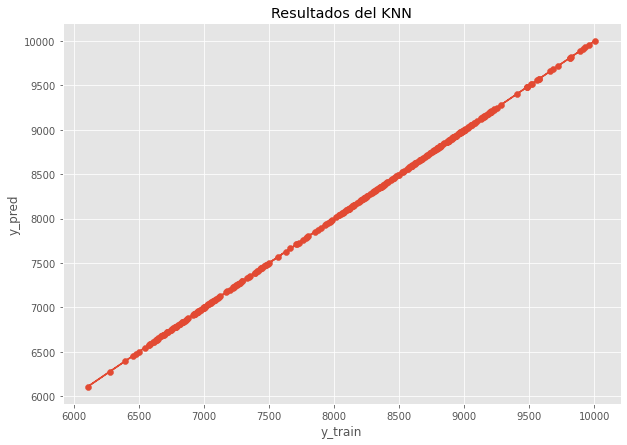

In [84]:
# Se realiza la gráfica 
plt.figure(figsize=(10,7))
plt.scatter(y_train,y_pred_knn_train) 
plt.plot(y_pred_knn_train, y_pred_knn_train)
plt.xlabel('y_train', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.title('Resultados del KNN')
plt.show()

### TEST

In [85]:
#Predicción
y_pred_knn_test = knn.predict(X_test_n)
y_pred_knn_test = pd.DataFrame(y_pred_knn_test, columns = ['futIBEX'])
y_pred_knn_test

,futIBEX
0,8774.101385
1,8137.000661
2,8794.092541
3,8789.667330
4,8833.303940
...,...
147,6679.866578
148,7004.909594
149,8586.185217
150,9079.087382


In [86]:
y_test

,futIBEX
date,
2021-09-14,8635.4
2021-02-17,8058.1
2021-07-12,8694.8
2021-11-19,8821.3
2021-09-13,8780.0
...,...
2020-05-22,6856.8
2020-08-13,7154.3
2021-12-27,8688.9


In [87]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_test, y_pred_knn_test)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_test, y_pred_knn_test)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_test, y_pred_knn_test)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#
r2 = metrics.r2_score(y_test,y_pred_knn_test)

print("- TEST -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))


- TEST -
Resultado de las métricas:
MAE: 111.79
MAPE: 0.01
RMSE 153.39
R2: 0.97


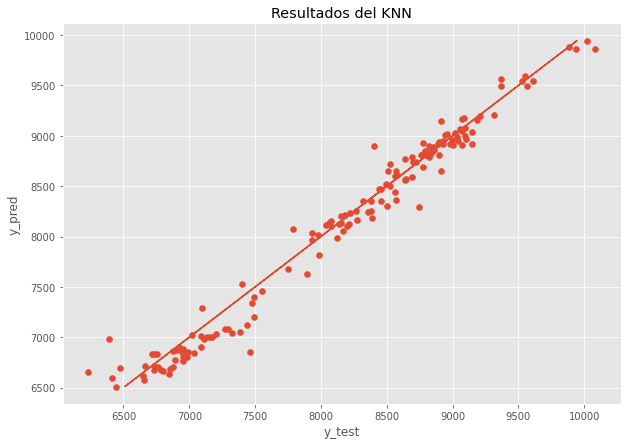

In [88]:
# Se realiza la gráfica 
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred_knn_test) 
plt.plot(y_pred_knn_test, y_pred_knn_test)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.title('Resultados del KNN')
plt.show()

### Despliegue del modelo

## Prueba del modelo predictivo para obtener beneficios

In [89]:
X_train.columns.tolist()

['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225', 'MA7', 'difMA7', 'dif', '^IBEX']

In [90]:
#Se va a probar el modelo de regresión para todo el rango de valores del estudio
var_pruebas=X_train.columns.tolist()
df_pruebas=df_ori[var_pruebas+['flag']]
df_pruebas

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag
date,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0
...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0


In [91]:
#Se normalizan los datos para obtener las predicciones
df_pruebas_n = scaler.fit_transform(df_pruebas.drop('flag',axis=1))
df_pruebas_n = pd.DataFrame(df_pruebas_n, columns=col_train)
df_pruebas_n

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
0,0.669003,0.567874,0.641509,0.516937,0.897733,0.648365,0.621474,0.864274
1,0.673326,0.546652,0.642145,0.529305,0.891904,0.650391,0.630101,0.860351
2,0.666021,0.559458,0.639047,0.521613,0.887223,0.650503,0.629489,0.856176
3,0.675265,0.566045,0.638680,0.522785,0.883693,0.677878,0.676843,0.871467
4,0.678694,0.579949,0.651062,0.530445,0.883404,0.718766,0.706210,0.898828
...,...,...,...,...,...,...,...,...
499,0.814820,0.627881,0.897087,0.847526,0.541784,0.696230,0.728418,0.573458
500,0.834352,0.649835,0.915786,0.850687,0.542865,0.721430,0.683451,0.591465
501,0.857611,0.679839,0.936638,0.867416,0.548262,0.753114,0.703640,0.617770
502,0.883704,0.698866,0.946746,0.858780,0.555591,0.765004,0.675375,0.632456


In [92]:
#Se realiza la predicción para todo el conjunto
df_pruebas['predIBEX'] = knn.predict(df_pruebas_n)
df_pruebas

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,predIBEX
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9547.180160
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9556.697337
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9549.266715
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9623.573741
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9627.607255
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8433.902147
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8429.106992
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8537.285732


In [93]:
#Se calcula la diferencia esperada entre el valor predicho para mañana y el valor real de hoy
df_pruebas['preddif']=round((df_pruebas['predIBEX']-df_pruebas['^IBEX']),2)
df_pruebas

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,predIBEX,preddif
date,,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9547.180160,3.28
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9556.697337,28.40
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9549.266715,37.57
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9623.573741,51.07
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9627.607255,-53.69
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8433.902147,46.40
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8429.106992,-29.99
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8537.285732,-26.41


In [94]:
#Se calcula la señal de compra-venta con la predicción
#Si el valor predicho para mañana es superior o igual, se compra (1)
#Si el valor predicho para mañana es inferior, se vende (0)
#Se calculan las señales de compra
df_pruebas.loc[df_pruebas['preddif'] >= 0, 'predflag'] = 1 
df_pruebas.loc[df_pruebas['preddif'] < 0, 'predflag'] = 0
df_pruebas

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,predIBEX,preddif,predflag
date,,,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9547.180160,3.28,1.0
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9556.697337,28.40,1.0
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9549.266715,37.57,1.0
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9623.573741,51.07,1.0
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9627.607255,-53.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8433.902147,46.40,1.0
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8429.106992,-29.99,0.0
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8537.285732,-26.41,0.0


## Evaluación del rendimiento económico

In [95]:
# Función para la evaluación de la operación
def evalua (prediccion, realidad):
  if prediccion == 1 and realidad ==1:
    res=1
  elif prediccion == 0 and realidad ==1:
    res=0
  elif prediccion == 1 and realidad ==0:
    res=-1
  elif prediccion == 0 and realidad ==0:
    res=0
  return res

In [96]:
#Cálculo del rendimiento de las operaciones
rend_total=0
for index, fila in df_pruebas.iterrows():
  rendimiento=evalua(fila['predflag'],fila['flag'])
  rend_total=rend_total+rendimiento
print("Rendimiento acumulado:",rend_total)

Rendimiento acumulado: 159


---

# SVM

Existen varias implementaciones diferentes del SVM. Se van a pobrar algunas de ellas para observar con cuales se obtienen los mejores resultados.

## Preparación de los conjuntos de datos

In [97]:
#Columna donde se recogen las variables predictoras
var_pred=df.columns.to_list()
var_pred.remove('futIBEX')
var_pred.remove('flag')

In [98]:
#Se generan los df para X e y
X=df[var_pred]
y=df[['futIBEX']]

In [99]:
X

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
date,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3
...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7


In [100]:
#Escalado de las variables predictivas
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [101]:
#Se generan los conjuntos de datos mediante un split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True
                                    )

## Creación del modelo SVM Lineal

In [102]:
# Creación del modelo
model_svm_1 = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.2))

# Ajuste del modelo
model_svm_1.fit(X_train, y_train)

# Aplicación de un pipeline: creacion + ajuste del modelo
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

### Predicciones

In [103]:
# Predicciones del conjunto de test
y_pred_svm_1_test = model_svm_1.predict(X_test)
y_pred_svm_1_test

array([8822.35057805, 8171.57773724, 8911.25158327, 8618.89118039,
       8790.17703613, 7410.82863861, 9534.59100721, 8988.3599831 ,
       8793.41699135, 8893.43682953, 8285.72435678, 7916.67407903,
       8029.98051577, 9003.15044993, 8399.43760429, 9325.5547061 ,
       8643.38867589, 7011.35822202, 8981.1389631 , 8926.93841635,
       7107.25036745, 8617.31466104, 7099.87350501, 8215.07281236,
       8943.55634747, 6969.92264377, 7012.54447525, 6769.72902758,
       8033.0429743 , 6954.08282305, 8428.84931836, 6671.23017887,
       8772.75161438, 8551.39633401, 8107.46651907, 8743.17669728,
       8944.47175022, 9036.42053738, 8128.25470311, 8108.48713941,
       6826.97482937, 9517.54552156, 7317.64461638, 8491.94518597,
       7225.40167422, 8563.04416323, 9390.29646006, 6871.62798092,
       9531.14585651, 6655.91915395, 8043.80858943, 6813.85469667,
       9401.36547106, 7155.58938637, 8275.78038695, 8911.78687752,
       6979.6421869 , 7178.78243919, 6754.86051122, 9068.44022

In [104]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_test, y_pred_svm_1_test)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_test, y_pred_svm_1_test)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_test, y_pred_svm_1_test)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#
r2 = metrics.r2_score(y_test,y_pred_svm_1_test)

print("- TEST -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

- TEST -
Resultado de las métricas:
MAE: 147.51
MAPE: 0.02
RMSE 238.72
R2: 0.94


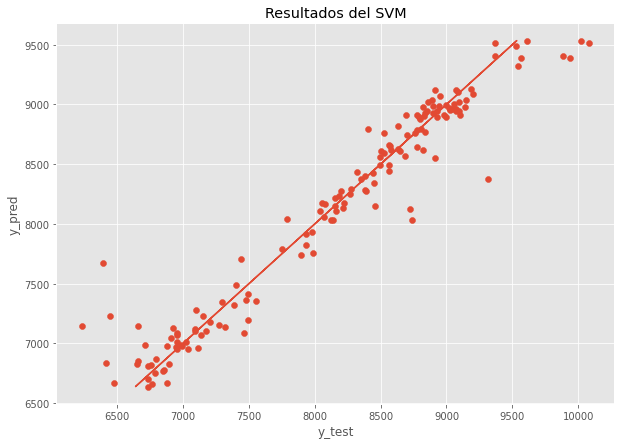

In [105]:
# Se realiza la gráfica 
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred_svm_1_test) 
plt.plot(y_pred_svm_1_test, y_pred_svm_1_test)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.title('Resultados del SVM')
plt.show()

### Búsqueda de los mejores hiperparámetros con GridSearchCV

Se decide buscar un conjunto de hiper parámetros que mejore los resultados

In [106]:
#Definición de los parámetros de búsqueda:
parametros=[{'C': [1,100,1000],
             'kernel':['linear', 'poly', 'rbf'],
             'gamma': [0.1, 0.3, 0.5, 0.7, 0.9]}]

In [107]:
#Generación del modelo
svreg=SVR()

In [108]:
#GridSearch
grid_search=GridSearchCV(estimator=svreg,
                         param_grid=parametros,
                         cv=5,
                         n_jobs=-1)

#Muestra de los mejores resultados
grid_search=grid_search.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
print('Mejores parámetros:',grid_search.best_params_)
print('Mejor resultado:',grid_search.best_score_)

Mejores parámetros: {'C': 1000, 'gamma': 0.3, 'kernel': 'rbf'}
Mejor resultado: 0.9840505592082074


### Definición del modelo con los mejores hiperparámetros

In [110]:
#Mejores hiperparámetros
C_b=1000
g_b=0.1
k_b='linear'

In [111]:
#Generación del modelo
model_svr=SVR(C=C_b, gamma=g_b, kernel=k_b)

In [112]:
#Ajuste del modelo a los datos de entrenamiento
model_svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, gamma=0.1, kernel='linear')

### Predicciones

#### TRAIN

In [113]:
#Generación de las predicciones
y_pred_svr_train=model_svr.predict(X_train)

In [114]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_train, y_pred_svr_train)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_train, y_pred_svr_train)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_train, y_pred_svr_train)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_train,y_pred_svr_train)

print("- TRAIN -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

- TRAIN -
Resultado de las métricas:
MAE: 83.82
MAPE: 0.01
RMSE 120.2
R2: 0.98


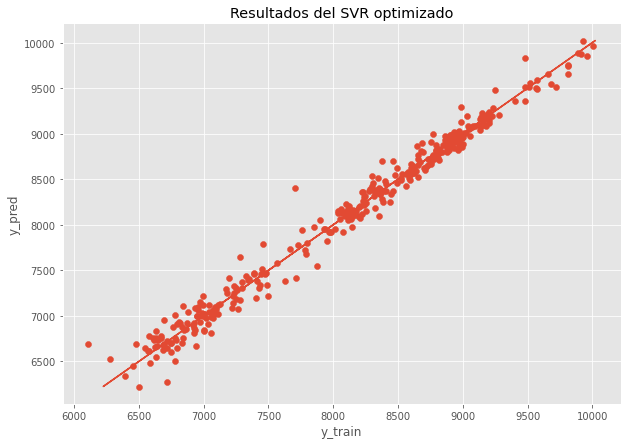

In [115]:
# Se realiza la gráfica 
plt.figure(figsize=(10,7))
plt.scatter(y_train,y_pred_svr_train) 
plt.plot(y_pred_svr_train, y_pred_svr_train)
plt.xlabel('y_train', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.title('Resultados del SVR optimizado')
plt.show()

#### TEST

In [116]:
#Generación de las predicciones
y_pred_svr_test=model_svr.predict(X_test)

In [117]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_test, y_pred_svr_test)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_test, y_pred_svr_test)

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_test, y_pred_svr_test)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#
r2 = metrics.r2_score(y_test,y_pred_svr_test)

print("- TEST -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2))
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

- TEST -
Resultado de las métricas:
MAE: 87.38
MAPE: 0.01
RMSE 141.25
R2: 0.98


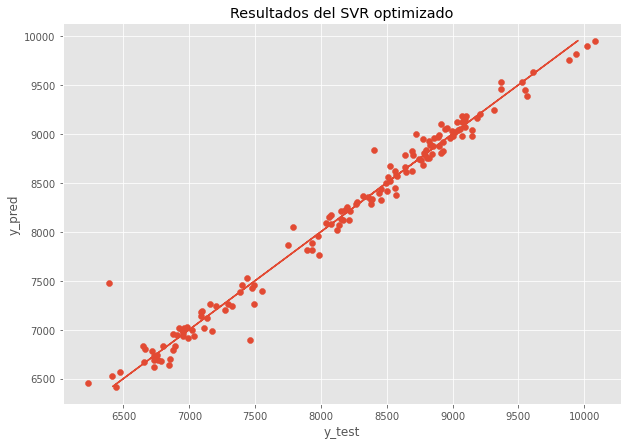

In [118]:
# Se realiza la gráfica 
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_pred_svr_test) 
plt.plot(y_pred_svr_test, y_pred_svr_test)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('y_pred', fontsize=12)
plt.title('Resultados del SVR optimizado')
plt.show()

## Prueba del modelo predictivo para obtener beneficios

In [119]:
var_pruebas

['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225', 'MA7', 'difMA7', 'dif', '^IBEX']

In [120]:
#Se va a probar el modelo de regresión para todo el rango de valores del estudio
df_pruebas=df[var_pruebas]
df_pruebas

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
date,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3
...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7


In [121]:
#Se escalan los datos para obtener las predicciones
df_pruebas_n = scaler.fit_transform(df_pruebas)
df_pruebas_n = pd.DataFrame(df_pruebas_n, columns=col_train)
df_pruebas_n

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX
0,0.669003,0.567874,0.641509,0.516937,0.897733,0.648365,0.621474,0.864274
1,0.673326,0.546652,0.642145,0.529305,0.891904,0.650391,0.630101,0.860351
2,0.666021,0.559458,0.639047,0.521613,0.887223,0.650503,0.629489,0.856176
3,0.675265,0.566045,0.638680,0.522785,0.883693,0.677878,0.676843,0.871467
4,0.678694,0.579949,0.651062,0.530445,0.883404,0.718766,0.706210,0.898828
...,...,...,...,...,...,...,...,...
499,0.814820,0.627881,0.897087,0.847526,0.541784,0.696230,0.728418,0.573458
500,0.834352,0.649835,0.915786,0.850687,0.542865,0.721430,0.683451,0.591465
501,0.857611,0.679839,0.936638,0.867416,0.548262,0.753114,0.703640,0.617770
502,0.883704,0.698866,0.946746,0.858780,0.555591,0.765004,0.675375,0.632456


In [122]:
#Se realiza la predicción para todo el conjunto
df_pruebas['predIBEX'] = model_svr.predict(df_pruebas_n)
df_pruebas

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,predIBEX
date,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,9528.208416
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,9508.977093
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,9494.370589
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,9550.460425
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,9652.663575
...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,8373.502083
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,8451.805333
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,8555.256824


In [123]:
#Se calcula la diferencia esperada entre el valor predicho para mañana y el valor real de hoy
df_pruebas['preddif']=round((df_pruebas['predIBEX']-df_pruebas['^IBEX']),2)
df_pruebas

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,predIBEX,preddif
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,9528.208416,-15.69
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,9508.977093,-19.32
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,9494.370589,-17.33
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,9550.460425,-22.04
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,9652.663575,-28.64
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,8373.502083,-14.00
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,8451.805333,-7.29
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,8555.256824,-8.44


In [124]:
#Se calcula la señal de compra-venta con la predicción
#Si el valor predicho para mañana es superior o igual, se compra (1)
#Si el valor predicho para mañana es inferior, se vende (0)
#Se calculan las señales de compra
df_pruebas.loc[df_pruebas['preddif'] >= 0, 'predflag'] = 1 
df_pruebas.loc[df_pruebas['preddif'] < 0, 'predflag'] = 0

#Se añade la variable de señal de compra-venta
df_pruebas=df_pruebas.join(df_ori['flag'])

df_pruebas

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,predIBEX,preddif,predflag,flag
date,,,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,9528.208416,-15.69,0.0,0.0
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,9508.977093,-19.32,0.0,0.0
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,9494.370589,-17.33,0.0,1.0
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,9550.460425,-22.04,0.0,1.0
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,9652.663575,-28.64,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,8373.502083,-14.00,0.0,1.0
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,8451.805333,-7.29,0.0,1.0
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,8555.256824,-8.44,0.0,1.0


## Evaluación del rendimiento económico

In [125]:
# Función para la evaluación de la operación
def evalua (prediccion, realidad):
  if prediccion == 1 and realidad ==1:
    res=1
  elif prediccion == 0 and realidad ==1:
    res=0
  elif prediccion == 1 and realidad ==0:
    res=-1
  elif prediccion == 0 and realidad ==0:
    res=0
  return res

In [126]:
#Cálculo del rendimiento de las operaciones
rend_total=0
for index, fila in df_pruebas.iterrows():
  rendimiento=evalua(fila['predflag'],fila['flag'])
  rend_total=rend_total+rendimiento
print("Rendimiento acumulado:",rend_total)

Rendimiento acumulado: 45


---